### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [0]:
import numpy as np

In [2]:
import keras as ks

Using TensorFlow backend.


#### Collect Fashion mnist data from tf.keras.datasets 

In [0]:
from keras.datasets import fashion_mnist

#### Change train and test labels into one-hot vectors

In [5]:
(trainX, trainY), (testX, testY) = ks.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
trainX.shape

(60000, 28, 28)

In [7]:
trainY.shape

(60000,)

In [8]:
testX.shape

(10000, 28, 28)

In [9]:
testY.shape

(10000,)

In [10]:
np.unique(testY)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
indices,data = np.unique(testY, return_index=True)
print (indices)
print (data)

[0 1 2 3 4 5 6 7 8 9]
[19  2  1 13  6  8  4  9 18  0]


In [0]:
# There are 10 categorical values hence using num_classes = 10
trainY = ks.utils.to_categorical(trainY, num_classes=10)
testY = ks.utils.to_categorical(testY, num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [14]:
#Initialize Sequential model
model = ks.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model.add(ks.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(ks.layers.BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [15]:
#Add Dense Layer which provides 10 Outputs after applying softmax
model.add(ks.layers.Dense(200, activation='relu'))
model.add(ks.layers.Dense(100, activation='relu'))

#Dropout layer
model.add(ks.layers.Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [0]:
#Output layer
model.add(ks.layers.Dense(10, activation='softmax', name='Output'))

In [0]:

#Comile the model ((We will learn about optimizers it in the next residency))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
#Train the model
history=model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=50,
          batch_size=50)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 9s 144us/step - loss: 0.4953 - acc: 0.8220 - val_loss: 0.3926 - val_acc: 0.8559
Epoch 2/50
60000/60000 [==============================] - 8s 131us/step - loss: 0.3782 - acc: 0.8612 - val_loss: 0.3890 - val_acc: 0.8599
Epoch 3/50
60000/60000 [==============================] - 8s 128us/step - loss: 0.3409 - acc: 0.8745 - val_loss: 0.3600 - val_acc: 0.8706
Epoch 4/50
60000/60000 [==============================] - 8s 135us/step - loss: 0.3195 - acc: 0.8816 - val_loss: 0.3388 - val_acc: 0.8764
Epoch 5/50
60000/60000 [==============================] - 8s 129us/step - loss: 0.2979 - acc: 0.8895 - val_loss: 0.3454 - val_acc: 0.8774
Epoch 6/50
60000/60000 [==============================] - 8s 132us/step - loss: 0.2876 - acc: 0.8916 - val_loss: 0.3483 - val_acc: 0.8798
Epoch 7/50
60000/60000 [==============================] - 8s 136us/step - 

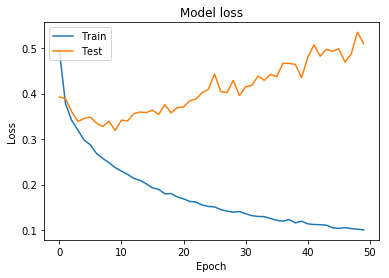

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()